# Machine Learning Engineer Nanodegree
# Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

----
## Table of Contents
- [Getting Started](#Getting-Started)
- [Understand the World](#Understand-the-World)
 - [Question 1](#Question-1)
- [Understand the Code](#Understand-the-Code)
 - [Question 2](#Question-2)
- [Implement a Basic Driving Agent](#Implement-a-Basic-Driving-Agent)
 - [Basic Agent Simulation Results](#Basic-Agent-Simulation-Results)
 - [Question 3](#Question-3)
- [Inform the Driving Agent](#Inform-the-Driving-Agent)
 - [Identify States](#Identify-States)
 - [Question 4](#Question-4)
 - [Define a State Space](#Define-a-State-Space)
 - [Question 5](#Question-5)
 - [Update the Driving Agent State](#Update-the-Driving-Agent-State)
- [Implement a Q-Learning Driving Agent](#Implement-a-Q-Learning-Driving-Agent)
 - [Q-Learning Simulation Results](#Q-Learning-Simulation-Results)
 - [Question 6](#Question-6)
- [Improve the Q-Learning Driving Agent](#Improve-the-Q-Learning-Driving-Agent)
 - [Improved Q-Learning Simulation Results](#Improved-Q-Learning-Simulation-Results)
 - [Question 7](#Question-7)
- [Define an Optimal Policy](#Define-an-Optimal-Policy)
 - [Question 8](#Question-8)

----

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
- So as I run this command `python smartcab/agent.py` to this directory on conda emulator, it executes/runs the `agent.py` file and starts to test the smartcab how it performs to different environments. Parallel to this, another window pops up called `'pygame window'` (simulator) to show the environment the smartcab is working in. It turns out that this window freezes and it shows complete blank screen, no environment seen whatsoever where the smartcab is working in. Also at the very beginning when the code starts executing, it shows this message `Simulator.__init__(): Error initializing GUI objects; display disabled`, but when I check the `__init__()` in `simulator.py` file, the `display` is set to `True` which makes me think that there's a bug in pygame. The conda emulator on the other hand which runs `agent.py` file, keeps executing the code.

- As the code is being exectued of `agent.py` file, it is testing the samrtcab performance in two conditions 
    * Performance in Red Lights.
    * Performance in Green Lights.


- When smartcab is tested for red lights, it shows that it is in idle state and its been receiving postive rewards ranging from `2.98 to 2.25`, which makes sense since we should be in idle state on red ligths. When its tested under Green Lights with no oncoming traffic, it's still in idle state and its been receiving negative rewards ranging from `-4.9 to -4.25`, which makes sense since it shoudn't be idle on green lights even though there's no traffic ahead.

- Seeing such results its clear that the smartcab doesn't move at all. The red light gives the smartcab positive rewards while at green lights negative. The agent has not been yet taught the rules of traffic signals, or may be its been taught nothing. ;)

- And on neither performance tests the agent is forced to meet deadlines which is bad because without setting time limit we can't know how reliable the smartcab is to work in given environment.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
- In the `agent.py` file, these are the 3 flags that change the simulation.
    * **num_dummies**: This sets number of dummy agents in the environment we can set. The higher the dummy agents, the higher our chances of accidence and also slows our agent to let by go other dummies who has higher priority.
    * **alpha**: Sets the rate of learning, default is 0.5. At the rate 0, the agent will not learn anything and when set to 1 it would consider to take the recent information.
    * **display**: Default True, Set to False to disable the GUI if PyGame is enabled. 


- In the `environment.py` file, `act()` function is called when an agent performs an action.

- In the `simulater.py` file, `render_text()` is the non-GUI render display of the simulation, simulated trail data is rendered in the command prompt, while `render()` is GUI render display of simulation.

- In the `planner.py` file, the `next_waypoint()` considers first whether the agent has reached the destination, if not then checks for whether the destination is East or West direction to its location, if not then checks for whether the destination is North or South direction to its location. Therefore it considers **East-West direction first.**

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


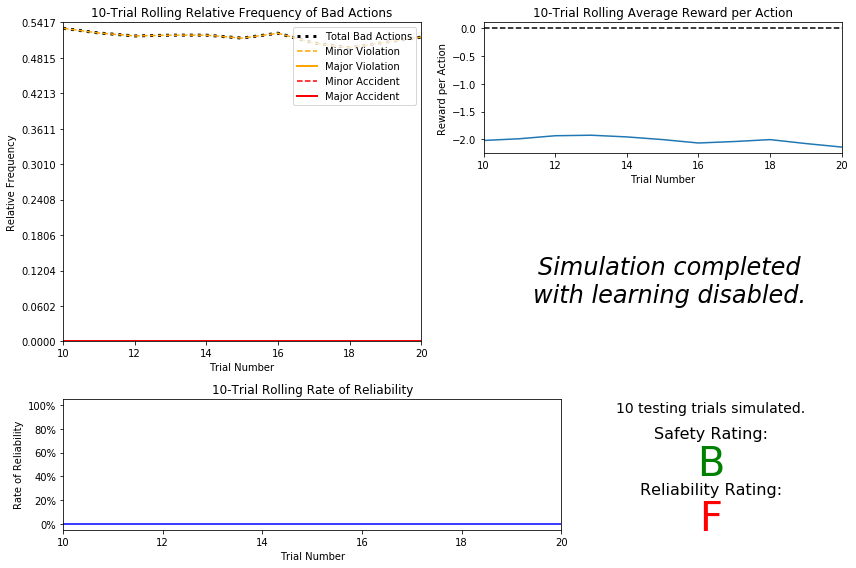

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
- When drving agent makes bad decisions in other words takes wrong actions, it gets negative rewards. The worst the decision the higher negative rewards to it. As we can see in the above visualization of our initial simulation, out of 20 trails that were conducted, in all last 10 trails it got negative rewards for every trail, all `averaging to -2` and in the last 2 trails we see its average negative reward is being increasing.
- Even though its receiving negative rewards, we don't see it making any major or minor accidents. But yes we do see that it has commited to some minor violations at the frequency rate ranging from `0.52 to 0.54 (approx)`. Commiting to Minor violations means failing to move on green light. Since we have already discussed that the cab isn't been taught yet to drive, meaning its not the smartcab yet, so commiting to minor violation makes sense. 
- If the agent is driving randomly then this means that it has no destination to go to. There's no target for the agent to achieve. Reliability means your agent is being tested whenther it reaches its destination in time or not. Here destination being nothing, testing for reliability woudn't make sense. And as we can see it has 0% reliability score in last 10 trials which falls in our`F` grade.
- As we can see, as the number of trials increases, we dont see much of significant change in terms of bad actions, it ranges between `0.52 to 0.54`, reliability on the other hand is being constant to 0. And the average reward for bad action they take is -2 but in last 2 trails we see its increasing. So increasing the trail number here woudn't help.
- After seeing all this I woudn't consider this safe or reliable, in fact as I said earlier this cab is not been taught to drive, its just at the idle state, being in idle state gives you good safety scores (Relative Freq.) when the signal is red but the score drops when the signal is at green since it need to move hence giving us B grade in terms of safety. 

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

Let's see which features are relevant to us that will make our smartcab safety and efficient -

- The most important feature here to consider would be the `inputs that we get from the sensors of the smartcab`. It takes 4 inputs as we can see above, `Light` sensor is useful to determine the color of the traffic lights which is helpful because we want the smartcab to hault and go when it should. In other words, the color of the `light` which is our state should trigger right action in smartcab in order to avoid traffic violation which would avoid accidents which would in turn determine our safety.

- Now once our smarcab is trained for signal regulation, we should then program it to take safe actions when other cars are present nearby. For example avoiding crashing with other cars and hault when other cars are passing by. All this will be taken care of by other 2 sensors `left and oncoming`. This would help us in getting better safety grades.
    - `input[left]` = If 'left' has a car that intends to go straight, then the car should not take a right turn on a red light, as this would cause an accident. However, if the car on the 'left' intends to go right or left, the agent is also safe to take a right.
    - `input[oncoming]` = 'Oncoming' is important when our agent wants to turn left, as when the light is green it still needs to wait.


- `waypoint` sensor will help us to reach our destination by giving direction depending on where we are. This sensor will help us in getting better at efficiency since this would help us ensure that the smartcab reaches the destination in the most efficient manner possible.

- `deadline` will not be included in our features because it does not help our agent to learn how to operate safely in the environment. Adding deadline to our features would add another dimension in our Q-matrix, causing it take a lot of time in training and it would find hard time learning proper actions.

- `input[right]` doesn't seem to have any importance here unless the car would be able to take a U-turn within an intersection. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
Let's create a table showing types & number of states each feature has:

| Features | States | No. of States |
| -------- | ------ | ------------- |
| **inputs-light** | Red, Green | 2|
| **inputs-left** | None, left, right, forward | 4|
| **inputs-oncoming** | None, left, right, forward | 4|
| **waypoint** | left, right, forward | 3|

Now in order to get the size of the state space, we multiply all the number of possible states. **`2 x 4 x 4 x 3 = 96`**. I woudn't need much training trials here as it doesn't have much states.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

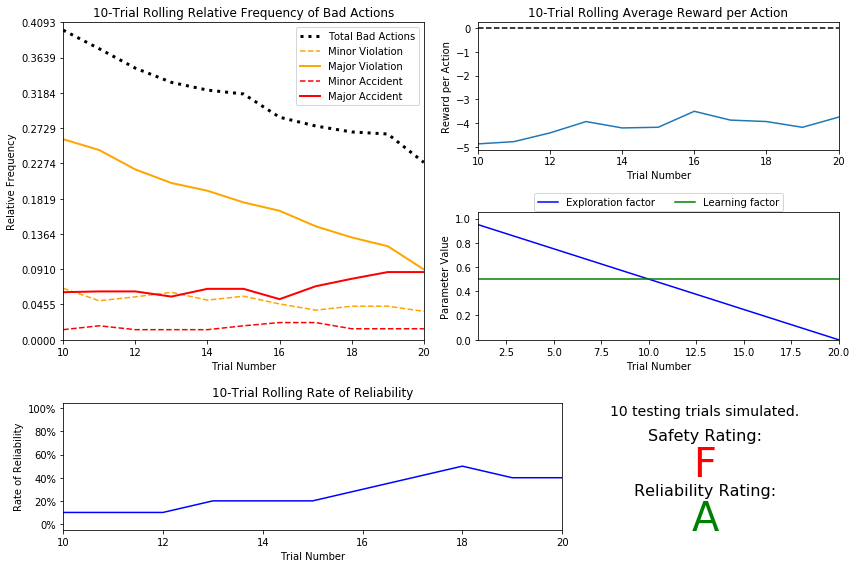

In [2]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

- The agent went through 20 trials before testing because Epsilon is being decreased by `0.05` and it needs to hit zero before testing begins. So what makes epsilon zero is the 20 trials by this method ..$$ 0.05 * 20 = 1 $$ This decaying function given is accurately represented in the parameter panel as it decreases after each trial and at trail 20 it hits 0.

- The agent's safety score has decreased poorly, getting an `F` from previous `B`, like the basic driving agent. Basic Driving agent had `0` Major accidents, Minor accidents and Major Violation and it had more than `~50%` of minor violation. By applying default Q-learning agent, we have done Major accidents by`~6%` but in last 4 trials it has increased by `~4%` which is not good at all. `Total bad action & Major Violation` is constantly being decreased as the trial goes on which is a good sign that its learning. `Minor violation & Minor Accidents` are around a constant range but there's a decrease in terms of `Minor violation` in last 3 trials.

- As the number of training trials increases, the relative frequency of bad action is constantly decreasing from `~40% to ~25%` which increases our average reward value though its still receiving negative.

- As I discussed before about the scores, the reliability on the other hand when applied the basic Q-Learning agent, it has changed significantly from `~10% - ~40%` giving us an `A` grade. The trial number `18` had the highest reliability score and after trial `19` its being constant. Comparing all this to previously applied basic driving agent, the reliability has definitely improved, getting from plane vanilla `0%` to `40% - 45%` reliability score. But we need to do something about this `Safety` and also improve our `Reliability`.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

**To improve the Q-Learning, I haven't changed any additional flags but only of `optimized` to `True`. I have also changed `alpha & tolerance` value but only where noted. What I have changed is decay function for $\epsilon$, decreasing $\epsilon$ by less value than default of `0.5`, so we can get more training trials to get desired grades and scores.**

Let's try values decreasing from `0.05` in descending order and visualize its results:

**Using the following decay function for $\epsilon$:**

$$ \epsilon_{t+1} = \epsilon_{t} - 0.01, \hspace{10px}\textrm{for trial number } t$$

**with default `alpha & tolerance values`**

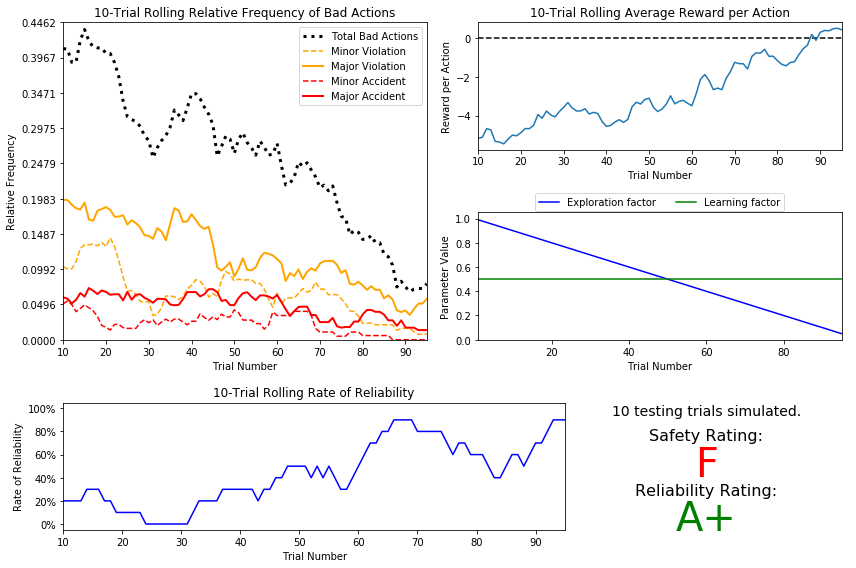

In [3]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_e-0.01.csv')

----------

**Using the following decay function for $\epsilon$:**

$$ \epsilon_{t+1} = \epsilon_{t} - 0.01, \hspace{10px}\textrm{for trial number } t$$


**alpha = 0.1 and tolerance = 0.001**

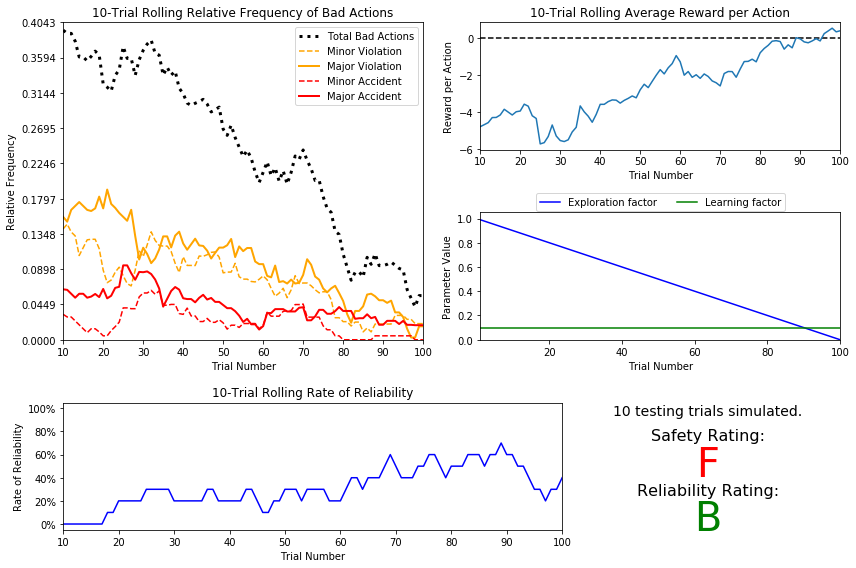

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_e-0.01_at.csv')

-------

**Using the following decay function for $\epsilon$:**

$$ \epsilon_{t+1} = \epsilon_{t} - 0.005, \hspace{10px}\textrm{for trial number } t$$

**with default `alpha & tolerance values`**

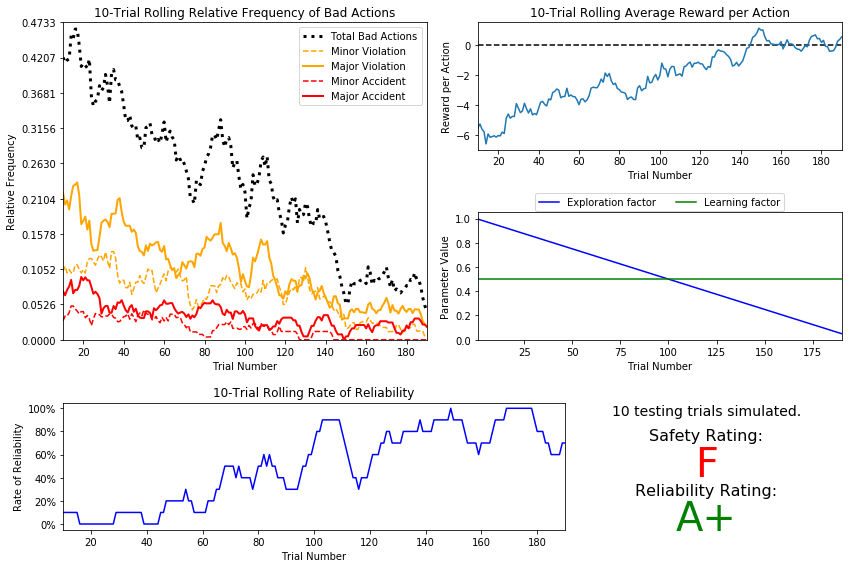

In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_e-0.005.csv')

-------

**Using the following decay function for $\epsilon$:**

$$ \epsilon_{t+1} = \epsilon_{t} - 0.005, \hspace{10px}\textrm{for trial number } t$$


**alpha = 0.1 and tolerance = 0.001**

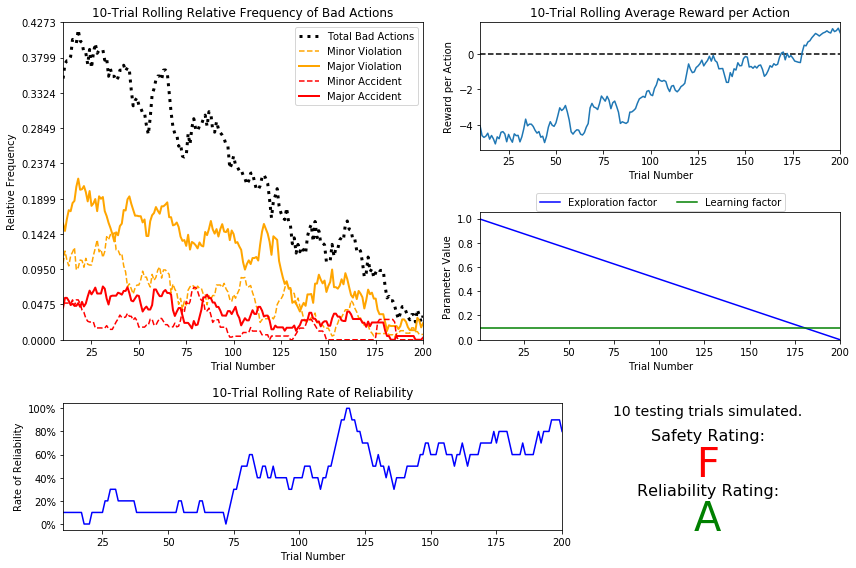

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_e-0.005_at.csv')

--------

**Using the following decay function for $\epsilon$:**

$$ \epsilon_{t+1} = \epsilon_{t} - 0.001, \hspace{10px}\textrm{for trial number } t$$

**with default `alpha & tolerance values`**

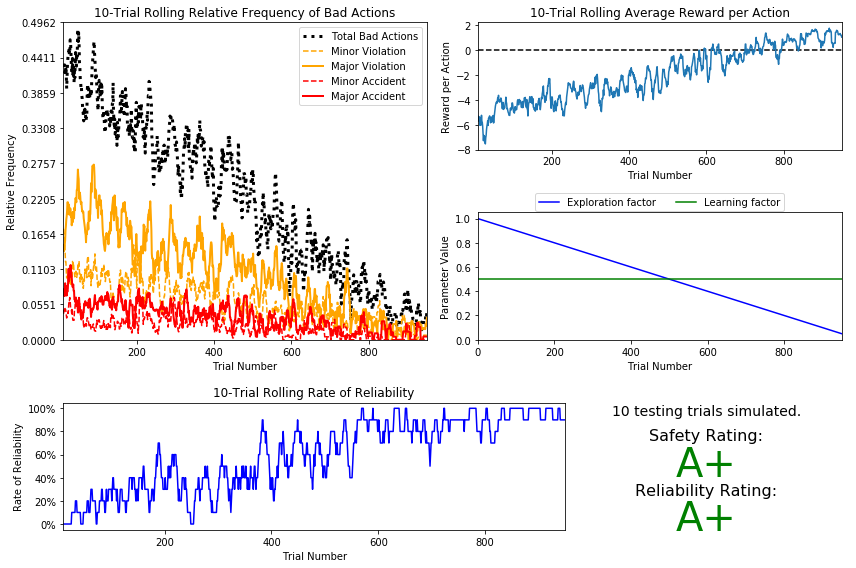

In [7]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_e-0.001.csv')

-----------

**Using the following decay function for $\epsilon$:**

$$ \epsilon_{t+1} = \epsilon_{t} - 0.001, \hspace{10px}\textrm{for trial number } t$$


**alpha = 0.1 and tolerance = 0.001**

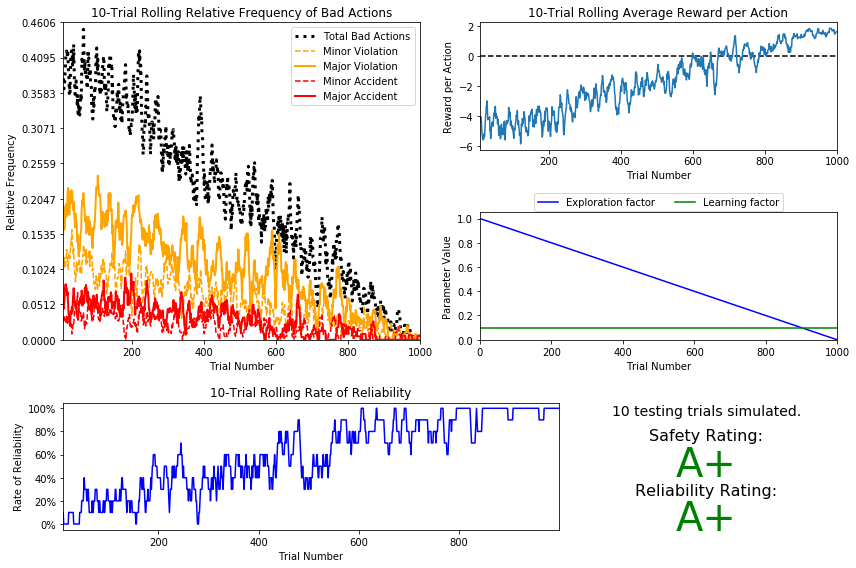

In [8]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_e-0.001_at.csv')

-------

**Using the following decay function for $\epsilon$:**

$$ \epsilon_{t+1} = \epsilon_{t} - 0.0005, \hspace{10px}\textrm{for trial number } t$$

**with default `alpha & tolerance values`**

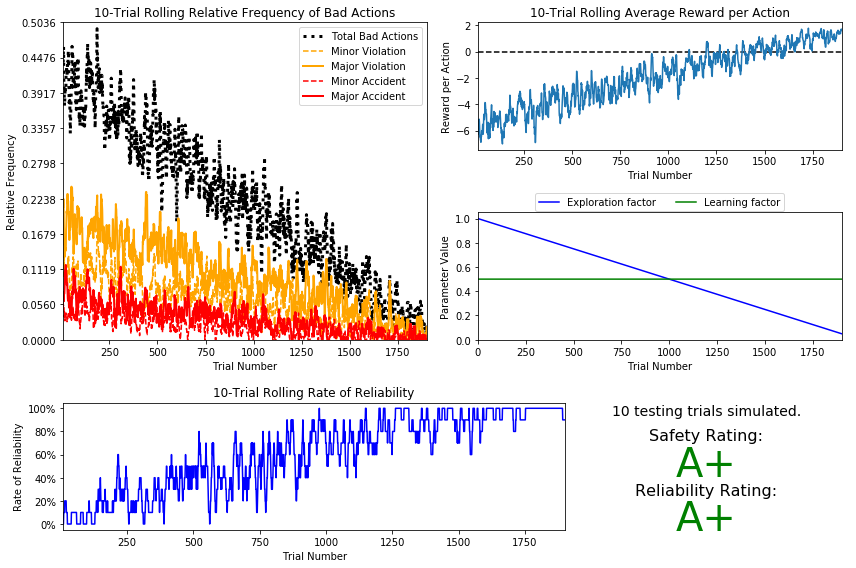

In [9]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_e-0.0005.csv')

-----------

**Using the following decay function for $\epsilon$:**

$$ \epsilon_{t+1} = \epsilon_{t} - 0.0005, \hspace{10px}\textrm{for trial number } t$$


**alpha = 0.1 and tolerance = 0.001**

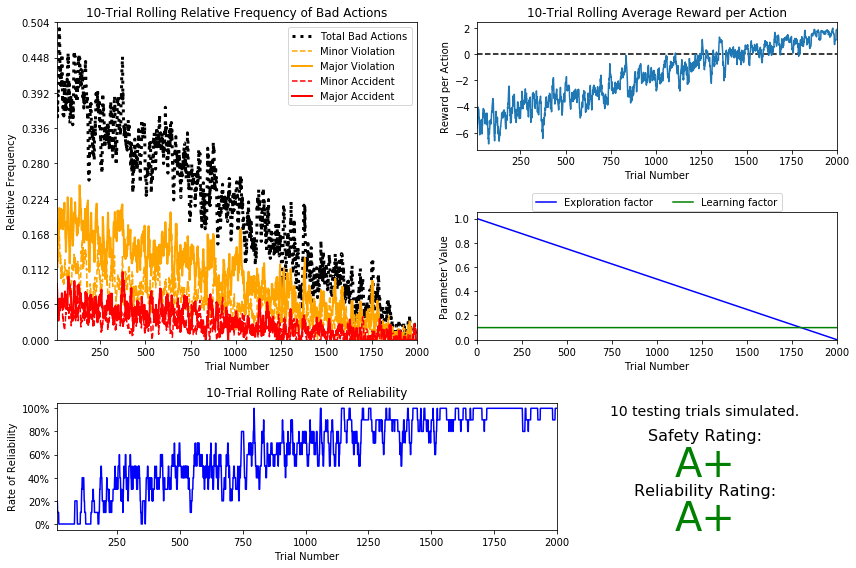

In [10]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_e-0.0005_at.csv')

-----------

**Using following decay function for $\epsilon$:**

$$ \epsilon_{t+1} = \epsilon_{t} - 0.0004, \hspace{10px}\textrm{for trial number } t$$

**with default `alpha & tolerance values`**

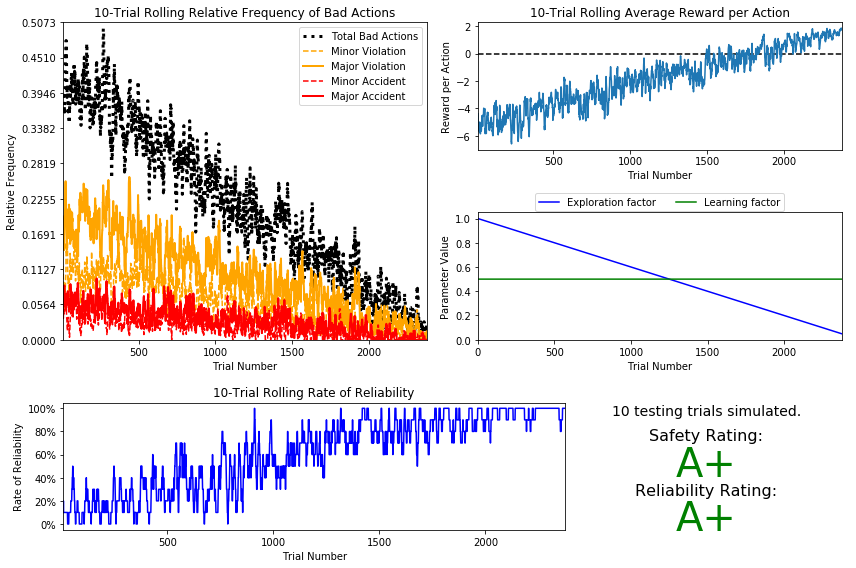

In [11]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_e-0.0004.csv')

---------

**Using following decay function for $\epsilon$:**

$$ \epsilon_{t+1} = \epsilon_{t} - 0.0004, \hspace{10px}\textrm{for trial number } t$$

**alpha = 0.1 and tolerance = 0.001**

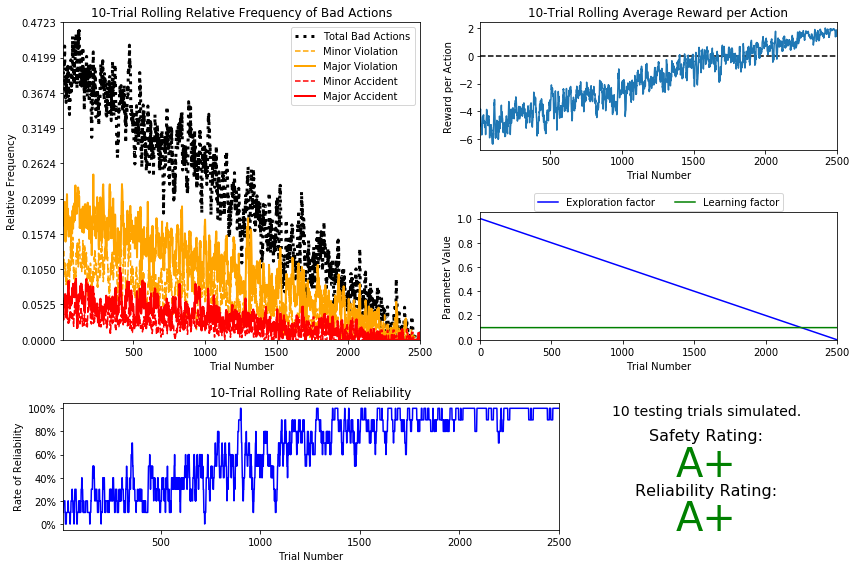

In [12]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_e-0.0004_at.csv')

----------

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

Below is the table of all the results that I got from the simulations that I ran above, values applied (epsilon, alpha & tolerance) and results delivered.

**Answer:** 

| **Attempt** | **Epsilon** | **Alpha** | **Tolerance** | **Safety** | **Reliability** | **Destination Reached** | **Training Trials** | **Tests** |
| ------- | ------- | ----- | --------- | ------ | ----------- | ------------------- |
| 1 | $$ \epsilon_{t+1} = \epsilon_{t} - 0.01\hspace{25px} $$ | 0.5 | 0.05 | **F** | **A+** | Yes | 95 | 10 |
| 2 | $$ \epsilon_{t+1} = \epsilon_{t} - 0.01\hspace{25px} $$ | 0.1 | 0.001 | **F** | **B** | Yes | 100 | 10 |
| 3 | $$ \epsilon_{t+1} = \epsilon_{t} - 0.005\hspace{25px} $$ | 0.5 | 0.05 | **F** | **A+** | Yes | 190 | 10 |
| 4 | $$ \epsilon_{t+1} = \epsilon_{t} - 0.005\hspace{25px} $$ | 0.1 | 0.001 | **F** | **A** | No | 200 | 10 |
| 5 | $$ \epsilon_{t+1} = \epsilon_{t} - 0.001\hspace{25px} $$ | 0.5 | 0.05 | **A+** | **A+** | Yes | 950 | 10 |
| **--> 6** | $$ \epsilon_{t+1} = \epsilon_{t} - 0.001\hspace{25px} $$ | **0.1** | **0.001** | **A+** | **A+** |**Yes** | **999** | **10** |
| 7 | $$ \epsilon_{t+1} = \epsilon_{t} - 0.0005\hspace{25px} $$ | 0.5 | 0.05 | **A+** | **A+** | Yes | 1901 | 10 |
| 8 | $$ \epsilon_{t+1} = \epsilon_{t} - 0.0005\hspace{25px} $$ | 0.1 | 0.001 | **A+** | **A+** | Yes |1999| 10 |
| 9 | $$ \epsilon_{t+1} = \epsilon_{t} - 0.0004\hspace{25px} $$ | 0.5 | 0.05 | **A+** | **A+** | Yes | 2376 | 10 |
| 10 | $$ \epsilon_{t+1} = \epsilon_{t} - 0.0004\hspace{25px} $$ | 0.1 | 0.001 | **A+** | **A+** | Yes | 2498 | 10 |

As you can see from the above table I have applied 5 different Epsilon values, giving each epsilon value a default and custom alpha and tolerance values, resulting in 10 attempts. In all attempts, Epsilon here is a Linear decaying function where epsilon gets decreased by x (epsilon value in any one attempt) each time through, the lower the epsilon value is decreased by, the higher training trails.

What I found here by running simulations with those different values is that it needs atleast around 1k trianing trails in order to get A+ grades both in terms of safety and reliability. As we increase training trails, the grade stays A+ consistantly but it does have a little ups and downs in terms of frequency in accidents and violation. More training attempts doesn't give null violation and accidents but we see it fluctuates around 0 frequency. Rewards also stays same around ~+2 for more than around 1000 training trails.

From all the different epsilon values applied, **the best one, the one that I would apply to the Improved Q-Learning Model is with Epsilon Value of 0.001 with alpha value value of 0.1 and tolerance value of 0.001.** In terms of grades, yes there are many getting A+ grades in both but it takes more time to train with higher training values and also the one choosen has most near approach to 0 in frequency in violation and accidents. I have highlighted with bold the model I choose also marked it. Attempt no. 6 is way to go!

------

To compare my Improved Q-Learning model with the default Q-Learning, I have made a table below which shows the results that I got from each. Comparing training Trails, Frequency of accidents & violation, grades and reliability score.

|           | **Training Trails** | **Parameter Value** | **Bad Action (Frequency)** | **Minor Violation (Frequency)** | **Major Violation (Frequency)** | **Minor Accidents (Frequency)** | **Major Accidents (Frequency)** | **Rewards** | **Safety** | **Reliability** | **Reliability Score** |
| -------------- | ------- | ----- | --------- | ------ | ----------- | ---------- | ------- | ------- | ------- | -------- |
| **Default Q-Learning** | 20 | 0.5 | ~22% | ~4.5% | ~9.1% | ~2% | ~9% | -4 | F | A | ~40% |
| **Improved Q-Learning** | 999 | 0.1 | ~0% | ~0% | ~0% | ~0% | ~0% | 2 | A+ | A+ | ~100% |


- Increased training trial by decreasing Epsilon by less each run.
- Bad Action's relative frequency goes from ~22% to ~0%.
- Minor Violation's relative frequency goes from ~4.5% to ~0%.
- Major Violation's relative frequency goes from ~9.1% to ~0%.
- Minor Accident's relative frequency goes from ~2% to ~0%
- Major Accident's relative frequency goes from ~9% to ~0%
- Rewards increases from -4 to +2.
- Safety Grades Uplifts from F to A+.
- Reliability Grades Uplifts from A to A+.
- Reliability Score boosts from ~40% to ~100%.


I would definitely say that the results show that the driving agent has learned an appropriate policy - the average reward being positive, along with 100% reliability and high safety with ~100% of good actions, shows it has become very effective.

**And YES! I am satisfied with the results above of the Q-Learning model I choosed after 999 trails.**

-------

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning_e-0.001_at.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

The Optimal Policy for the smartcab in the given environment is (in the way of an example):

- When waypoint is RIGHT:
    - If car is coming from LEFT, agent should WAIT.
    - Else, GO RIGHT.
- When waypoint is LEFT:
    - If light is GREEN AND oncoming traffic is moving LEFT OR NO oncoming traffic, agent shoult GO LEFT.
    - If light is RED, then WAIT.
    - Else, GO FORWARD.
- When waypoint is FORWARD:
    - If light is GREEN, agent should GO FORWARD.
    - Else, WAIT.

Investigating the `sim_improved-learning_e-0.001_at.txt` text file, to see the results of my Improved Q-Learning Model. I am selecting a random record from this file and here it is:

**Current State of My Agent**

| State | Waypoint | Input-Light | Input-Left | Input-Right | Input-Oncoming |
| --------- | ------------ | --------------- | -------------- | --------------- | ------------------ |
| **Current State** | Left | Green | None | None | None |

**Rewards Based on Actions depending on above State**

| Action | Forward | None | Right | Left |
| ------ | ------- | ---- | ----- | ---- |
| Reward | 0.81 | -5.11 | 0.72 | 2.02 |

The current state of the agent as we can see from the above table is when the waypoint is Left and the Signal is Green and there is no cab to left, right and oncoming traffic, the agent takes the left turn and thats the optimal action. Waiting on the other hand is bad action and there's heavy penalty to pay `-5.11` while moving forward or taking right would be minor violation, so there's much less reward of `0.81 and 0.72` respectively.


**Let's have a look to few more examples:**

**Current State of My Agent**

| State | Waypoint | Input-Light | Input-Left | Input-Right | Input-Oncoming |
| --------- | ------------ | --------------- | -------------- | --------------- | ------------------ |
| **Current State** | Forward | Red | Forward | None | None |

**Rewards Based on Actions depending on above State**

| Action | Forward | None | Right | Left |
| ------ | ------- | ---- | ----- | ---- |
| Reward | -31.58 | 1.91 | -17.21 | -35.79 |

When the waypoint of agent is Forward, and the Signal is RED, the agent does nothing and is idle which again here is an optimal action. Moving Forward, taking Right or Left violates the law and has heavy penalty to pay of `-31.58, -17.21 and -35.79`.

**Current State of My Agent**

| State | Waypoint | Input-Light | Input-Left | Input-Right | Input-Oncoming |
| --------- | ------------ | --------------- | -------------- | --------------- | ------------------ |
| **Current State** | Forward | Green | Right | None | None |

**Rewards Based on Actions depending on above State**

| Action | Forward | None | Right | Left |
| ------ | ------- | ---- | ----- | ---- |
| Reward | 2.22 | -3.66 | 0.14 | 0.30 |

When the waypoint of agent is Forward, and the Signal is GREEN, the agent moves Forward. Again an example of Good optimal action. Sitting Idle would violate the law with a penalty of `-3.66` and going Right or Left would result in minor violation which has less rewards.

**Current State of My Agent**

| State | Waypoint | Input-Light | Input-Left | Input-Right | Input-Oncoming |
| --------- | ------------ | --------------- | -------------- | --------------- | ------------------ |
| **Current State** | Left | Green | Forward | Forward | Forward |

**Rewards Based on Actions depending on above State**

| Action | Forward | None | Right | Left |
| ------ | ------- | ---- | ----- | ---- |
| Reward | -0.02 | -1.09 | 0.16 | -1.97 |

Here, when the waypoint of the agent is Left, and the Signal is GREEN, the optimal action here for the agent is shown that it should go to right which is not what we expect and might lead to accidents and also delaying arrival time. The penalty to go to the left here is more than sitting idle even though the agent waypoint is Left and signal is GREEN. The optimal action here should be Left, ofcourse, meaning it should have higher rewards than any state. But its the opposite. We may need more training trails to learn the optimal Q-table, since there are 384 different states. 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**